**MEDICAL INSURANCE COST PREDICTION**

* *11 PROJECT*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [3]:
insurance_dataset = pd.read_csv('insurance.csv')

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
* Sex
* Smoker
* Region

In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [8]:
#statistical measures
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


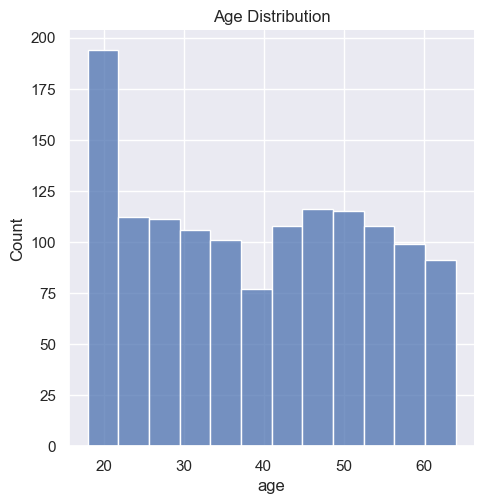

In [9]:
#distribution of age value
sns.set()
plt.Figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

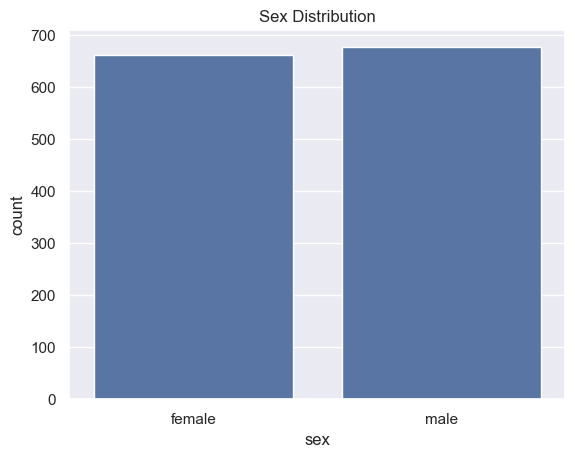

In [10]:
#Gender column
plt.Figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

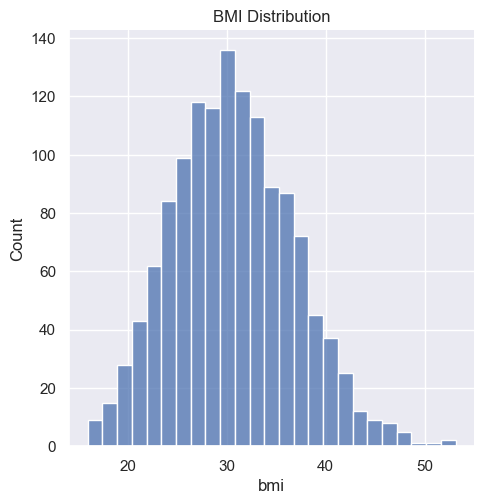

In [12]:
#distribution of BMI
sns.set()
plt.Figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

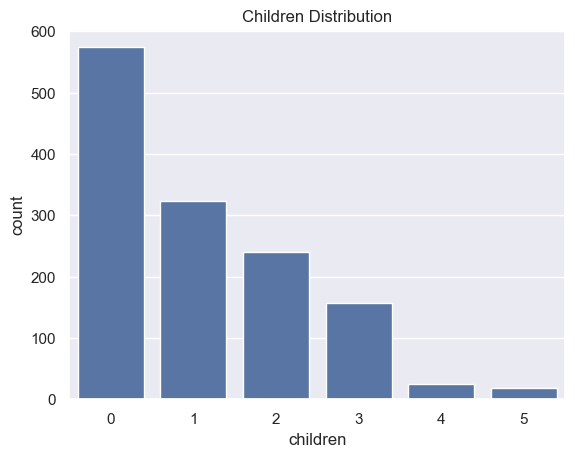

In [13]:
#distribution of children value
sns.set()
plt.Figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

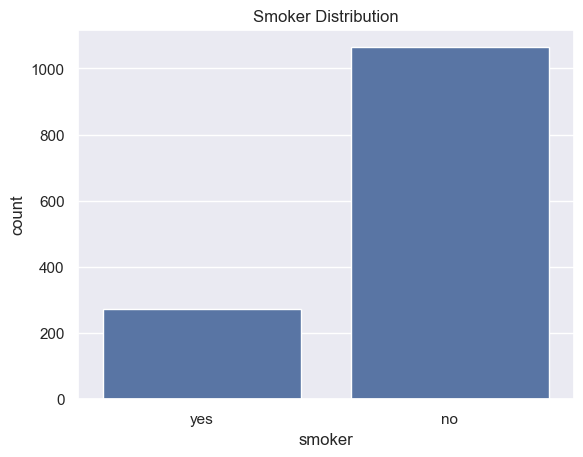

In [15]:
#Smoker column
plt.Figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

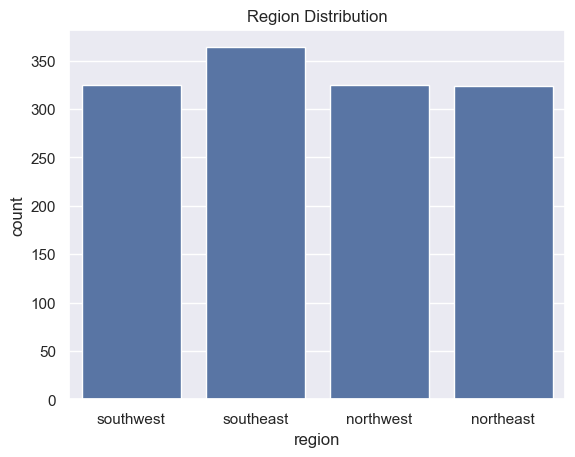

In [17]:
#Region column
plt.Figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

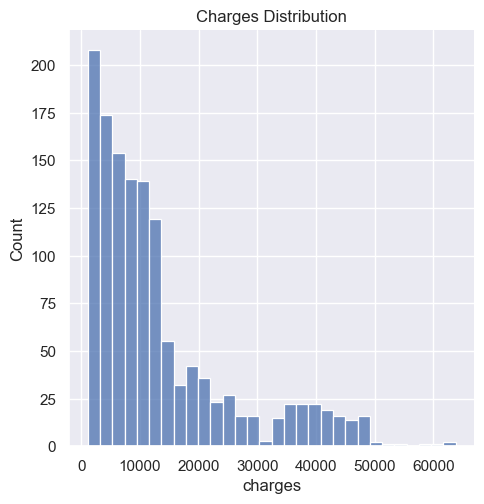

In [19]:
#distribution of charges value
plt.Figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

*Encoding the categorical features*

In [20]:
# Encoding 'sex' column
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# Encoding 'smoker' column
insurance_dataset.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)  # 'yes' should be 1 and 'no' should be 0

# Encoding 'region' column
insurance_dataset.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

C:\Users\arrma\AppData\Local\Temp\ipykernel_22084\2958003327.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\arrma\AppData\Local\Temp\ipykernel_22084\2958003327.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)  # 'yes' should be 1 and 'no' should be 0
C:\Users\arrma\AppData\Local\Temp\ipykernel_22084\2958003327.py:8: FutureWarning: Downcasting behavior in `replace` is d

In [21]:
print(insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       0   1725.55230
2      28    0  33.000         3       0       0   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       3  10600.54830
1334   18    1  31.920         0       0       2   2205.98080
1335   18    1  36.850         0       0       0   1629.83350
1336   21    1  25.800         0       0       1   2007.94500
1337   61    1  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


splitting the Features and Target

In [24]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [25]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [26]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting the data into Training data & Testing data

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [31]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [32]:
regressor = LinearRegression()

In [33]:
regressor.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [34]:
training_data_prediction = regressor.predict(x_train)

In [36]:
#R sq value
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R sq value : ', r2_train)

R sq value :  0.751505643411174


In [37]:
testing_data_prediction = regressor.predict(x_test)

In [38]:
#R sq value
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R sq value : ', r2_test)

R sq value :  0.7447273869684077


building a Predictive System

In [44]:
input_data = (31,1,25.74,0,0,0)

#changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are for only instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshape)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960514


c:\Users\arrma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
